# Downloading Financial Data

In [1]:
# Import Modules
import os
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs

# Magic function to enable matplotlib charting in jupyter notebooks
%matplotlib inline

# Allow Cell Multi Printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Financial Data

In [2]:
# This class will download data from yahoo finance
class FinancialData:
    
    # Class constructor to store parameters, download and format data
    def __init__(self, ticker, startDate, endDate):
        
        # Member Data
        self.ticker = ticker
        self.startDate = startDate
        self.endDate = endDate

        # Download and Format Data
        self.download_data()
        self.prepare_data()

    # Download data from yahoo finance
    def download_data(self):
        print(f"Downloading Data from Yahoo Finance for {self.ticker}")
        self.raw_data = yf.download(self.ticker, self.startDate, self.endDate)

    # Compute returns and drop NaN values
    def prepare_data(self):
        
        # Grab columns of interest
        copy_columns = ["Adj Close"]
        self.df = self.raw_data[copy_columns].copy()
        
        # Compute returns and drop NaN values
        self.df["Returns"] = np.log(self.df["Adj Close"] / self.df["Adj Close"].shift(1))
        self.df.dropna(inplace=True)
    
    def plot_data(self, cols=None):
        if cols is None:
            cols = ["Adj Close"]
        self.df[cols].plot(title=self.ticker)
        
    # Show data head and tail
    def show_data(self, nRows=-1):
        
        if (nRows <= 0):
            nRows = 5
        
        print("\n*** HEAD ***")
        print(self.df.head(nRows))

        print("\n*** TAIL ***")
        print(self.df.tail(nRows))


# Example: Download Financial Data

[*********************100%***********************]  1 of 1 completed

*** HEAD ***
             Adj Close   Returns
Date                            
2021-09-13  221.207260 -0.014609
2021-09-14  222.106003  0.004055
2021-09-15  223.094604  0.004441
2021-09-16  222.106003 -0.004441
2021-09-17  218.690826 -0.015496

*** TAIL ***
             Adj Close   Returns
Date                            
2023-09-29  434.989990  0.009470
2023-10-02  447.820007  0.029068
2023-10-03  435.170013 -0.028655
2023-10-04  440.410004  0.011969
2023-10-05  446.880005  0.014584


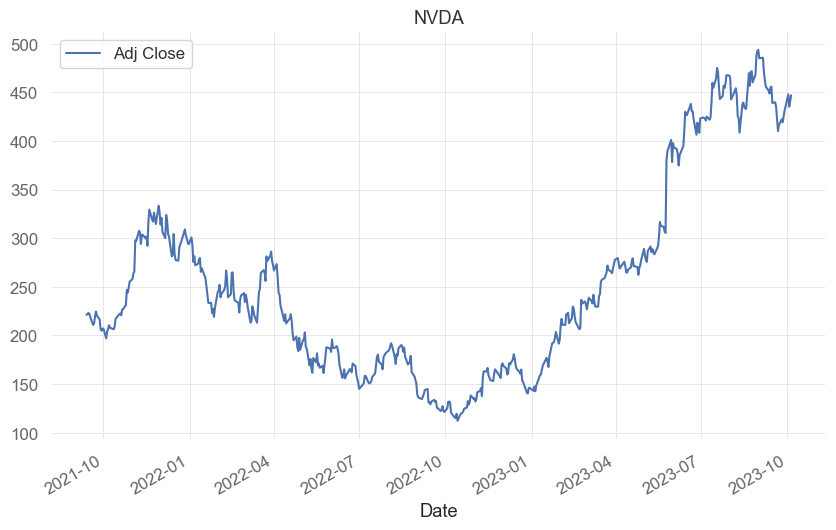

In [3]:
# 1. Define Ticker
ticker = "NVDA"

# 2. Define Back Test Period
nYears = 3

# Sytax for a specific end date
# endDate = dt.datetime(2021,6,30).date()

endDate = date.today()
startDate = endDate - pd.Timedelta(days=nYears * 252)

# 3. Load Data
fd = FinancialData(ticker, startDate, endDate)

# 4. Show Data (Optional)
fd.show_data()

# 5. Plot Data (Optional)
fd.plot_data()